# 1493. Longest Subarray of 1's After Deleting One Element

### Difficulty: <font color = orange> Medium </font>

---

Given a binary array `nums`, you should delete one element from it.

Return *the size of the longest non-empty subarray containing only `1`'s in the resulting array. Return `0` if there is no such subarray*.

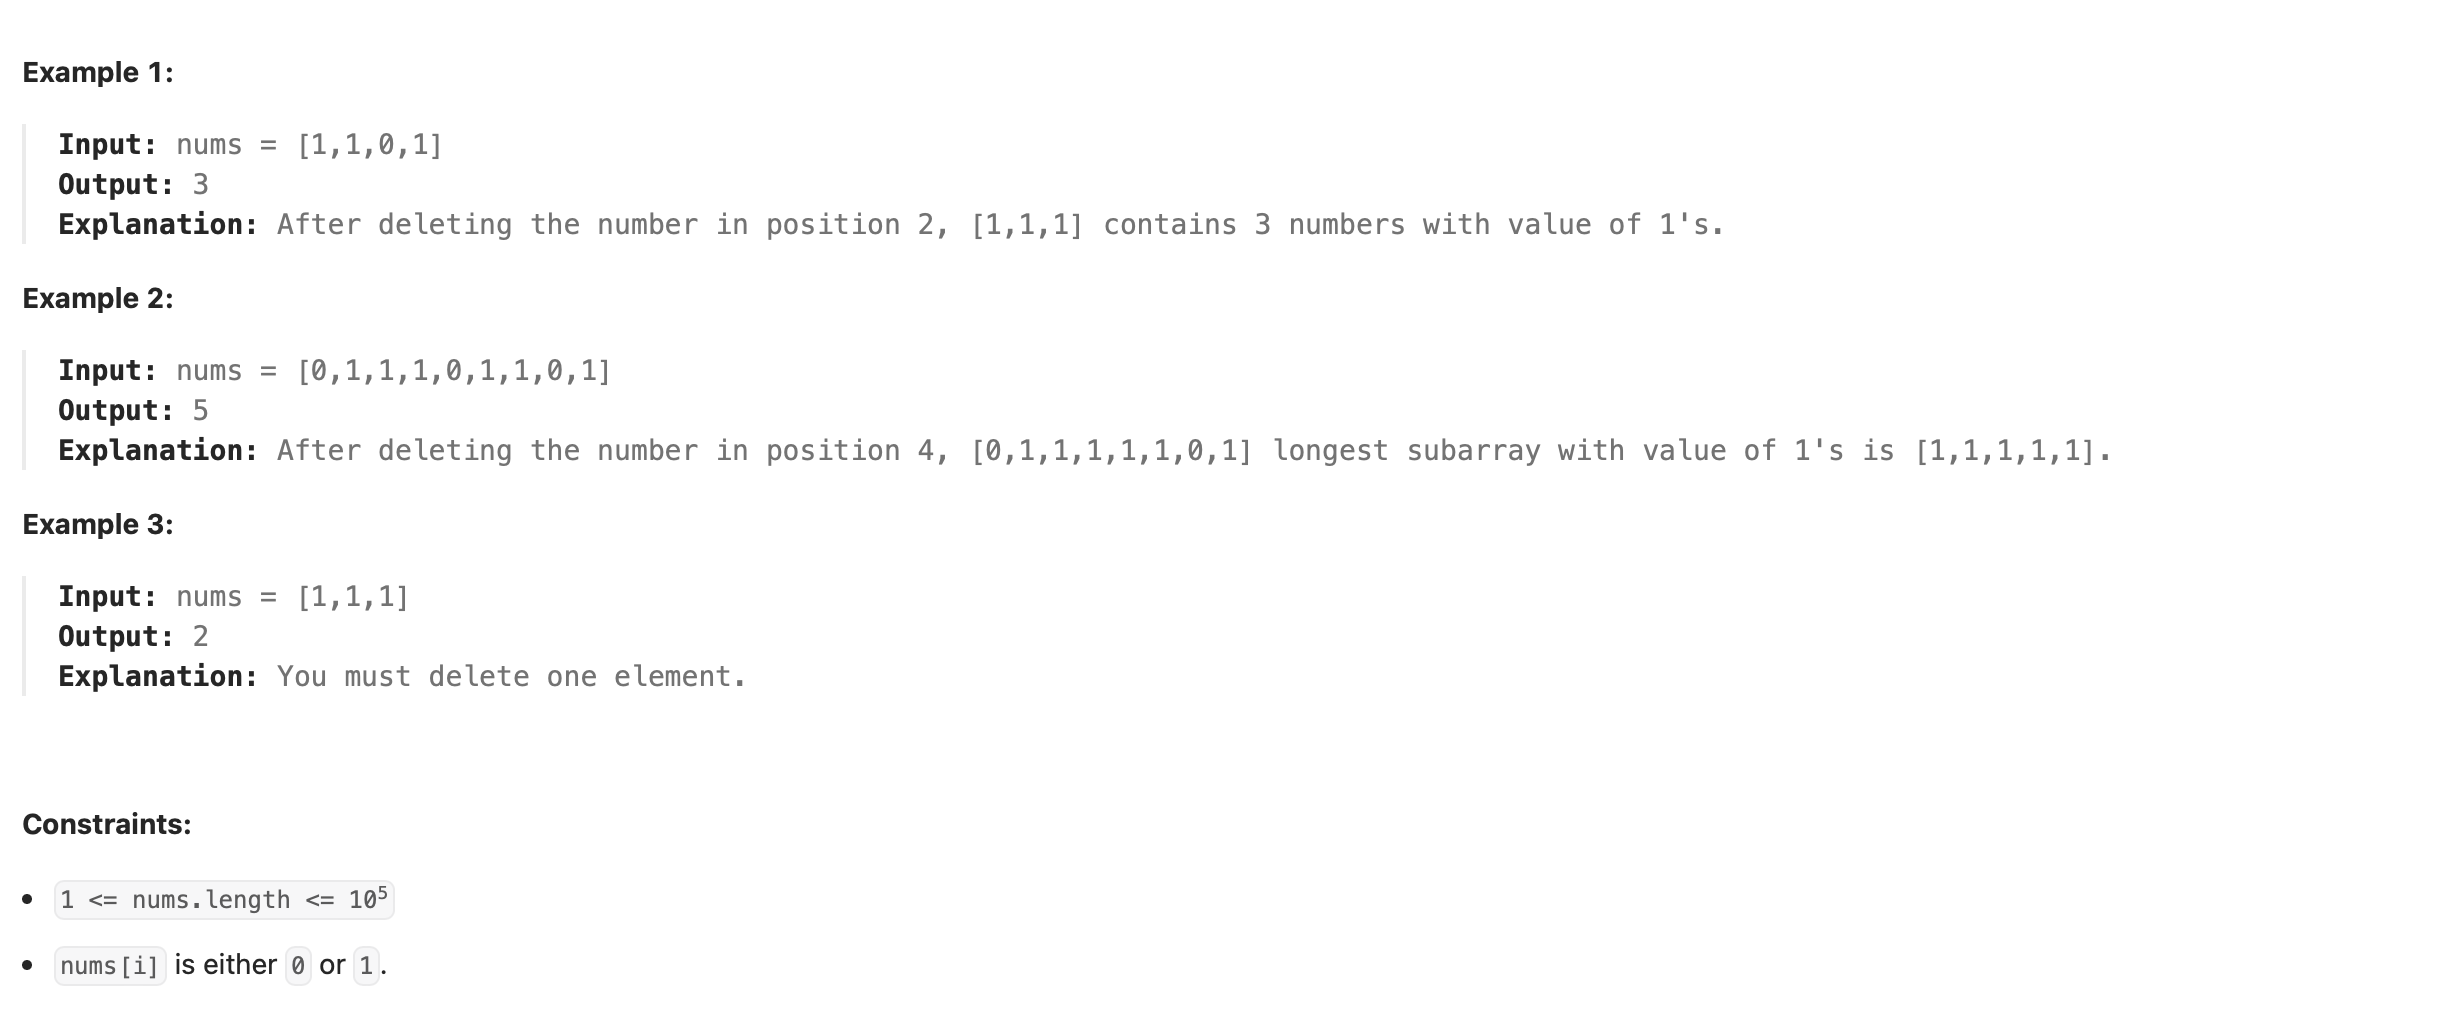

## Approach Overview:

Iterate through `nums` in search for the longest non-empty subarray containing only `1`'s we can form after removing exactly one element from `nums`. 

We use sliding window to implement this. At each iteration we check if the current window is valid (i.e. if the number of elements we can delete to make it all `1`s is less than or equal to one).

If not we shrink the window by removing elements from the left until its valid again.

We then calculate the length of the longest valid subarray formed so far.

## Detailed Explanation:

We're given an array `nums` constituting of only `1`s and `0`s and are asked to find the length of the longest subarray containing only `1`s we can make by deleting exactly one element.

Approach: 

We used a dictionary to keep track of the count of `1`s and `0`s in current window. 

*Key Insight:*

**windowlength - number of `1`s in window = number of elements we need to delete**

Iterate through `nums` in search for the longest non-empty subarray containing only `1`'s we can form by removing exactly one element from `nums`. 

We use sliding window to implement this. 

At each iteration we check if the current window is valid (i.e. if the number of elements we can delete to make it all `1`s is less than or equal to one).

If not (number of elements we need to delete is more than one), we shrink the window by removing elements from the left until its valid again.

We then calculate the length of the longest valid subarray formed so far.


## Key Challenges:

Coming up with a window validity condition check. I managed to do it, but it took a time minute :D

## Solution:

In [ ]:
class Solution:
    def longestSubarray(self, nums: List[int]) -> int:
        
        # initialize variable to track size of the longest valid subarray
        maxSize = 0
        
        # dictionary to store the count of 1s or 0s in current subarray window
        binaryCount = {}
        
        # initialize left pointer to use for the sliding window
        left = 0
        
        # iterate through every element in `nums`
        for right in range(len(nums)):
            
            # calculate the count of the current element
            binaryCount[nums[right]] = binaryCount.get(nums[right],0) + 1
            
            # check if current subarray window is invalid 
            # window is valid if the number of `0`s we can delete is more than one
            while (right - left + 1) - binaryCount.get(1,0) > 1:
                
                # remove elements from window (starting from the left)
                binaryCount[nums[left]] -= 1
                
                # increment left (slide the window)
                left += 1
                
            # calculate the size of the resulting subarray (non-empty subarray containing only 1's) 
            # and update `maxSize` if its the longest one seen so far
            maxSize = max(maxSize, right - left)
            
        # return the size of the longest non-empty subarray containing only 1's
        return maxSize